In [9]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [10]:
# Load data using relative path
DATA_PATH = Path("../data/cleaned_trips.parquet")  # Adjust relative path if needed
df = pd.read_parquet(DATA_PATH)

In [11]:
# Check basic info
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData types:")
print(df.dtypes)

Shape of dataset: (678, 45)

Columns: ['trip_completed_at', 'trip_status', 'ride_hailing_app', 'trip_uid', 'driver_uid', 'rider_uid', 'customer', 'trip_start_time', 'trip_end_time', 'trip_time', 'total_time', 'wait_time', 'trip_type', 'surge_multiplier', 'vehicle_make_model', 'vehicle_license_plate', 'driver_name_en', 'vehicle_make', 'vehicle_model', 'driver_gender', 'driver_photo_url', 'driver_phone_number', 'pickup_lat', 'pickup_long', 'dropoff_lat', 'dropoff_long', 'trip_map_image_url', 'trip_path_image_url', 'city', 'country', 'trip_start_address', 'trip_end_address', 'rub_usd_exchange_rate', 'price_rub', 'price_usd', 'distance_kms', 'temperature_time', 'temperature_value', 'feels_like', 'humidity', 'wind_speed', 'cloudness', 'weather_main', 'weather_desc', 'precipitation']

Data types:
trip_completed_at        datetime64[ns]
trip_status                      object
ride_hailing_app                 object
trip_uid                         object
driver_uid                       objec

In [12]:
# Convert datetime columns
for col in ['trip_start_time', 'trip_end_time', 'trip_completed_at']:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

In [13]:
# Handle numeric columns
for col in ['distance_kms', 'price_usd', 'wait_time']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

In [14]:
# Basic descriptive statistics
print("\nDescriptive statistics:")
display(df[['distance_kms','price_usd','wait_time']].describe())


Descriptive statistics:


,distance_kms,price_usd,wait_time
count,678.000000,678.000000,678.0
mean,10.057788,5.061593,0.0
std,8.735132,4.251843,0.0
min,0.010000,0.840000,0.0
25%,4.912500,2.760000,0.0
50%,7.290000,3.735000,0.0
75%,11.665000,5.670000,0.0
max,46.740000,33.550000,0.0


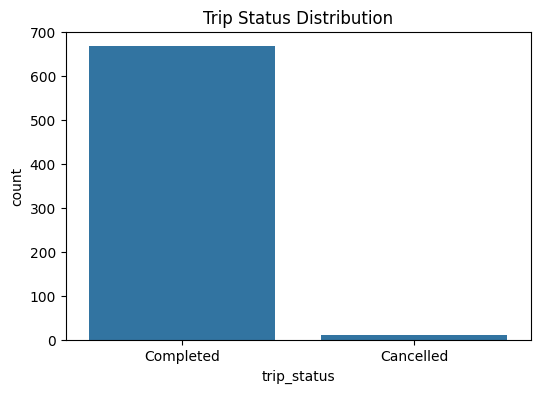

In [15]:
# Trip status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='trip_status')
plt.title("Trip Status Distribution")
plt.show()

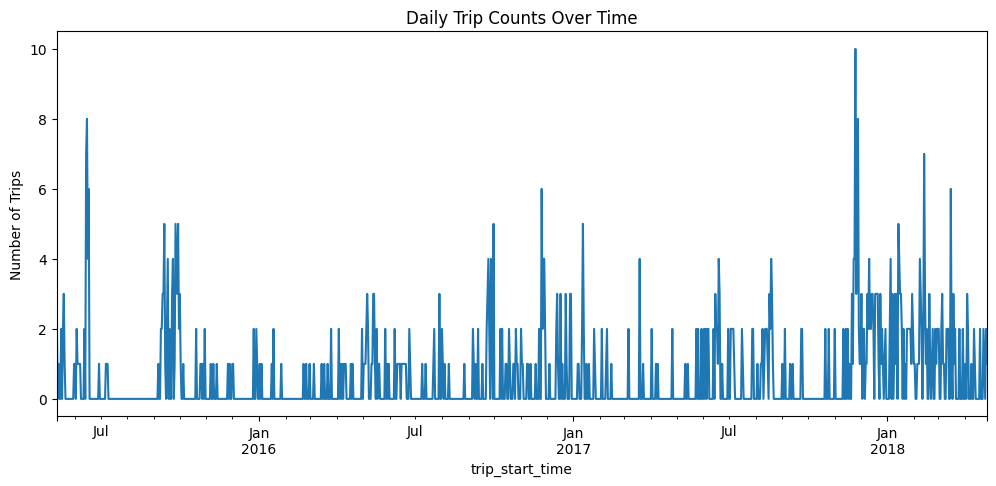

In [16]:
# Trips over time
if 'trip_start_time' in df.columns:
    plt.figure(figsize=(12,5))
    df.set_index('trip_start_time')['trip_uid'].resample('D').count().plot()
    plt.title("Daily Trip Counts Over Time")
    plt.ylabel("Number of Trips")
    plt.show()

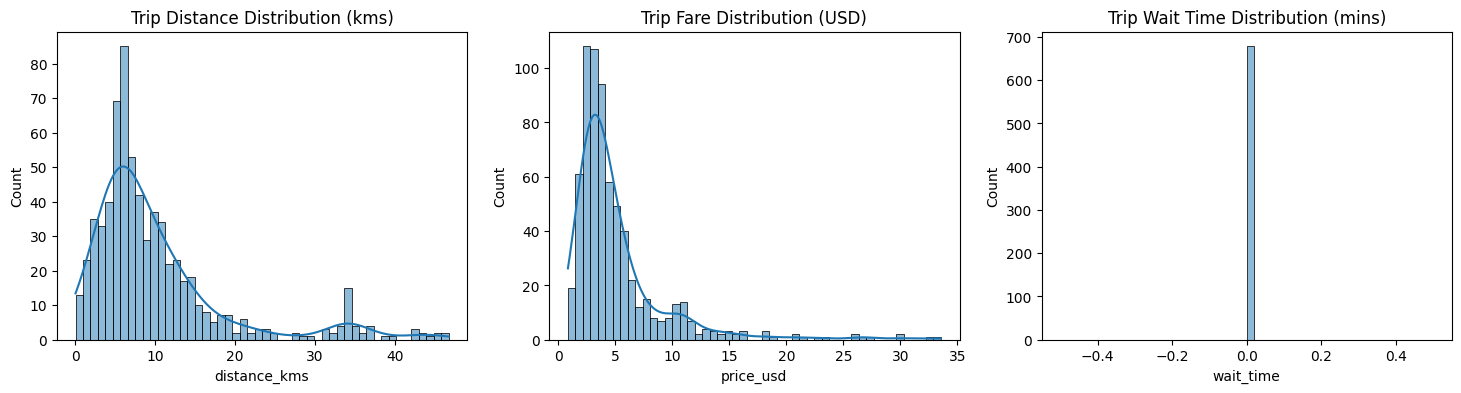

In [17]:
# Distribution of distance, fare, and wait time
fig, axes = plt.subplots(1,3, figsize=(18,4))
sns.histplot(df['distance_kms'], bins=50, ax=axes[0], kde=True)
axes[0].set_title("Trip Distance Distribution (kms)")
sns.histplot(df['price_usd'], bins=50, ax=axes[1], kde=True)
axes[1].set_title("Trip Fare Distribution (USD)")
sns.histplot(df['wait_time'], bins=50, ax=axes[2], kde=True)
axes[2].set_title("Trip Wait Time Distribution (mins)")
plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9272\1327812633.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly.index, y=hourly.values, palette="viridis")


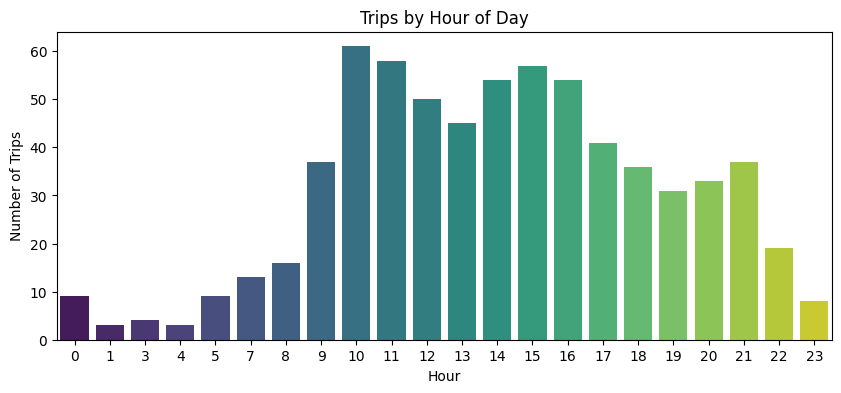

In [18]:
# Peak hours analysis
if 'trip_start_time' in df.columns:
    df['hour'] = df['trip_start_time'].dt.hour
    hourly = df.groupby('hour').size()
    plt.figure(figsize=(10,4))
    sns.barplot(x=hourly.index, y=hourly.values, palette="viridis")
    plt.title("Trips by Hour of Day")
    plt.xlabel("Hour")
    plt.ylabel("Number of Trips")
    plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_9272\3059469108.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")


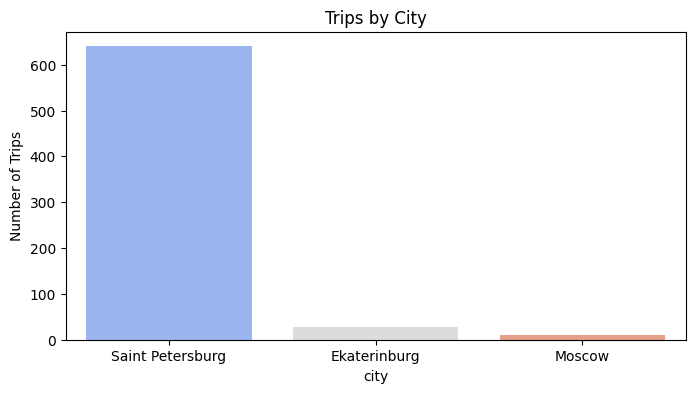

In [19]:
# City analysis
if 'city' in df.columns:
    city_counts = df['city'].value_counts()
    plt.figure(figsize=(8,4))
    sns.barplot(x=city_counts.index, y=city_counts.values, palette="coolwarm")
    plt.title("Trips by City")
    plt.ylabel("Number of Trips")
    plt.show()

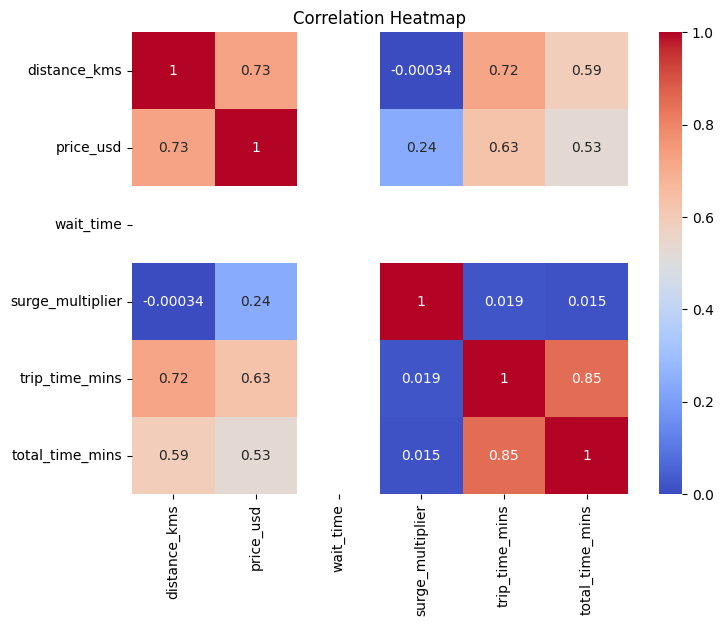

In [21]:
# Correlation heatmap for numeric columns

# Function to convert HH:MM:SS to minutes
def time_to_minutes(t):
    try:
        h, m, s = map(int, str(t).split(":"))
        return h*60 + m + s/60
    except:
        return 0

# Convert trip_time and total_time to numeric (minutes)
for col in ['trip_time','total_time']:
    if col in df.columns:
        df[col+'_mins'] = df[col].apply(time_to_minutes)

# Select numeric columns for correlation
numeric_cols = ['distance_kms','price_usd','wait_time','surge_multiplier']
# Add converted time columns
numeric_cols += [c+'_mins' for c in ['trip_time','total_time'] if c+'_mins' in df.columns]

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()
